In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn # scikit-learn.org library

In [2]:
URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
df = pd.read_csv(URL)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [7]:
# df'ni train_set va test_set'ga ajratish
# random_state orqali, chiqadigan elementlar fixed bo'ladi va bu tasodifiy qiymatlar beradi
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 50)

In [8]:
# train_set'ni ko'rishimiz mumkin
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4450,-118.21,34.07,42.0,902.0,318.0,1312.0,323.0,1.9375,168800.0,<1H OCEAN
14253,-117.10,32.71,29.0,3422.0,713.0,2775.0,644.0,1.7075,86900.0,NEAR OCEAN
15338,-117.29,33.20,16.0,2150.0,461.0,1428.0,407.0,2.4754,157300.0,NEAR OCEAN
18156,-122.06,37.36,35.0,2693.0,493.0,1343.0,455.0,6.0777,327500.0,<1H OCEAN
13431,-117.42,34.10,18.0,3977.0,809.0,2231.0,742.0,4.1399,115400.0,INLAND


In [9]:
# test_set hech qochon ko'rsatilmaydi, faqat o'zimiz modelni tekshirishimiz uchun kerak bo'ladi
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1945,-120.93,38.77,9.0,2229.0,355.0,788.0,341.0,5.5111,196300.0,INLAND
18006,-121.97,37.30,31.0,3340.0,735.0,1891.0,686.0,4.8542,275000.0,<1H OCEAN
13062,-121.32,38.57,15.0,3369.0,499.0,1733.0,470.0,5.3100,127500.0,INLAND
13396,-117.57,34.02,5.0,6933.0,1311.0,3845.0,1285.0,4.6727,158900.0,INLAND
9787,-120.79,36.06,29.0,1916.0,386.0,1019.0,314.0,2.4881,87500.0,<1H OCEAN


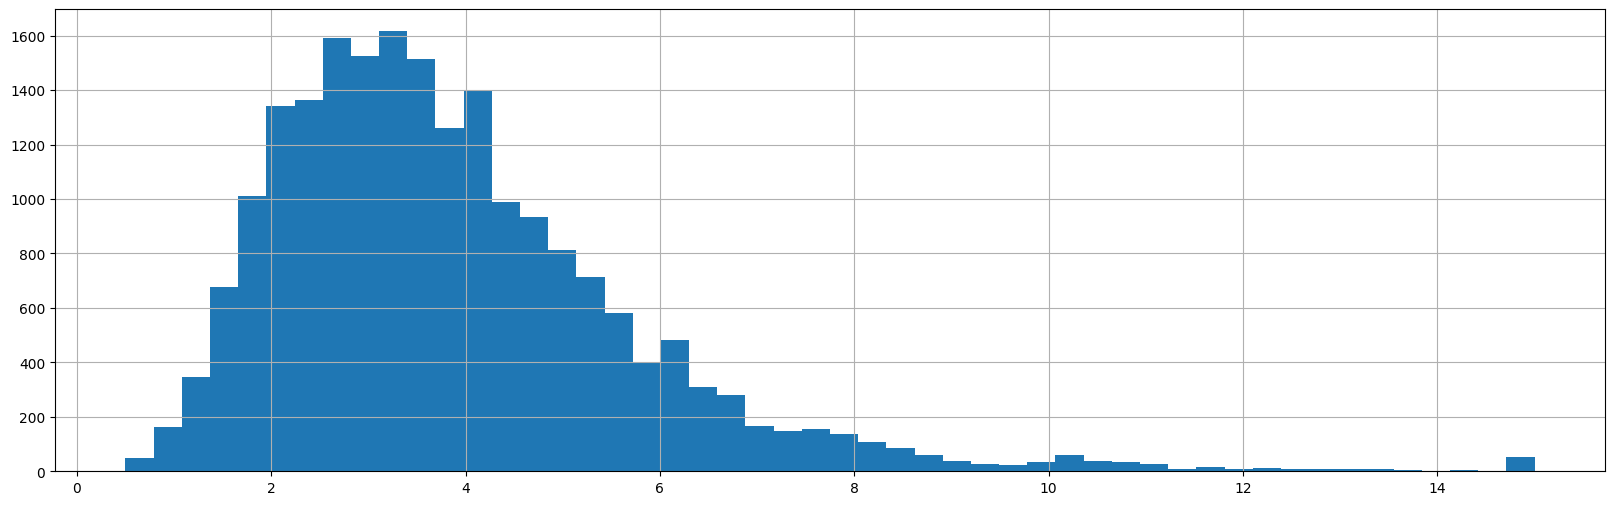

In [10]:
df["median_income"].hist(bins = 50, figsize = (20, 6))
plt.show()

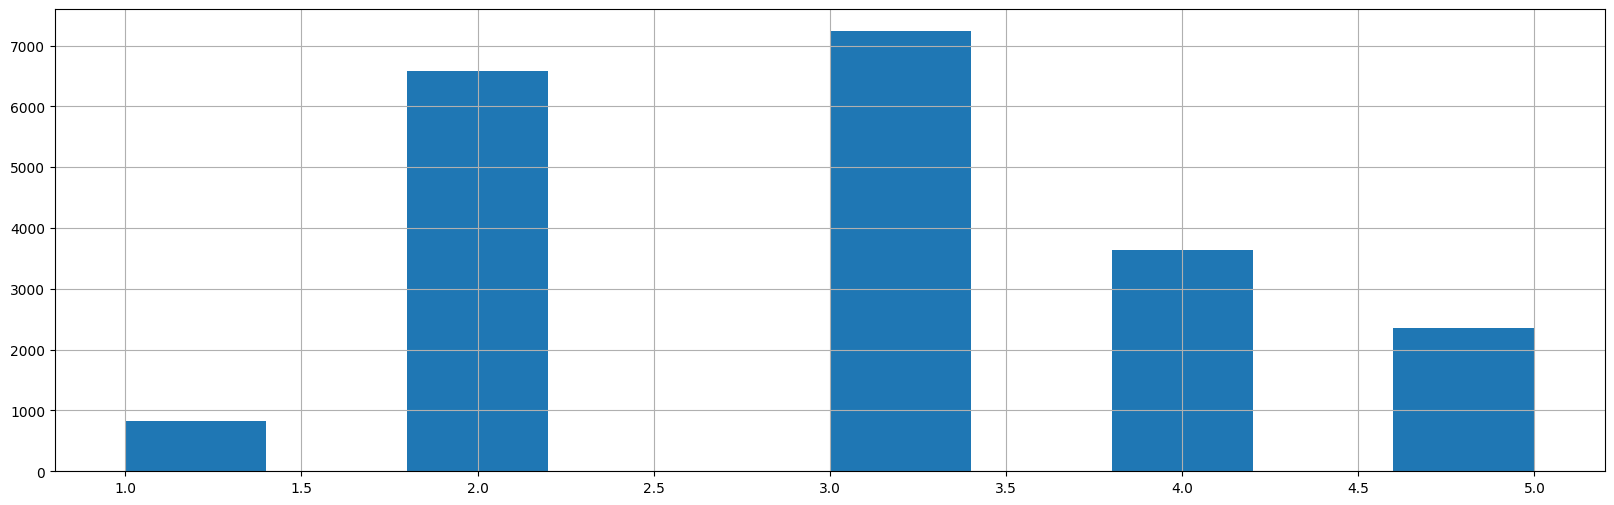

In [11]:
df["income_category"] = pd.cut(df["median_income"], bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf], labels = [1, 2, 3, 4, 5])
df["income_category"].hist(figsize = (20, 6))
plt.show()

In [12]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
12481,-121.50,38.58,5.0,761.0,306.0,2031.0,295.0,0.7526,162500.0,INLAND,1
13280,-117.65,34.10,44.0,2808.0,585.0,1444.0,550.0,2.7159,139300.0,INLAND,2
3619,-118.44,34.25,35.0,1583.0,324.0,1481.0,351.0,3.7000,176000.0,<1H OCEAN,3
16552,-121.23,37.84,28.0,1347.0,241.0,713.0,225.0,4.0208,155700.0,INLAND,3
5152,-118.26,33.95,38.0,1387.0,346.0,1240.0,355.0,1.6898,95100.0,<1H OCEAN,2


In [13]:
# bizga muvozanatli set kerak bo'lsa, quyidagi split usuli orqali split qilandi.
# masalan, erkak va ayol soni teng bo'lishi kerak bo'lsa bu split usuli foyda beradi
# lekin bu usul ko'pincha qo'llanilmaydi, asosan train_test_split orqali ajratiladi.
# bu split usuli bizga index orqali javob qaytaradi
from sklearn.model_selection import StratifiedShuffleSplit
stratifeid_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 50)
for train_index, test_index in stratifeid_split.split(df, df["income_category"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [14]:
strat_train_set.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
6349,-117.94,34.15,33.0,859.0,144.0,421.0,138.0,4.4821,220100.0,INLAND,3
6451,-118.04,34.12,30.0,2170.0,318.0,984.0,309.0,5.6916,500001.0,INLAND,4
9965,-122.48,38.48,29.0,2278.0,397.0,765.0,322.0,4.6379,348200.0,INLAND,4
20487,-118.67,34.30,5.0,6123.0,825.0,2440.0,736.0,7.9013,393000.0,<1H OCEAN,5
9683,-118.99,37.63,10.0,7744.0,1573.0,483.0,224.0,3.2917,231800.0,INLAND,3


In [15]:
strat_test_set.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
10209,-117.92,33.88,32.0,1683.0,273.0,719.0,263.0,5.3649,243600.0,<1H OCEAN,4
2799,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND,2
10810,-117.93,33.64,24.0,1395.0,396.0,1478.0,404.0,2.5301,192900.0,<1H OCEAN,2
7273,-118.24,33.99,28.0,312.0,89.0,498.0,87.0,2.4107,96400.0,<1H OCEAN,2
9636,-121.02,36.94,33.0,1541.0,313.0,880.0,272.0,2.5074,117700.0,INLAND,2


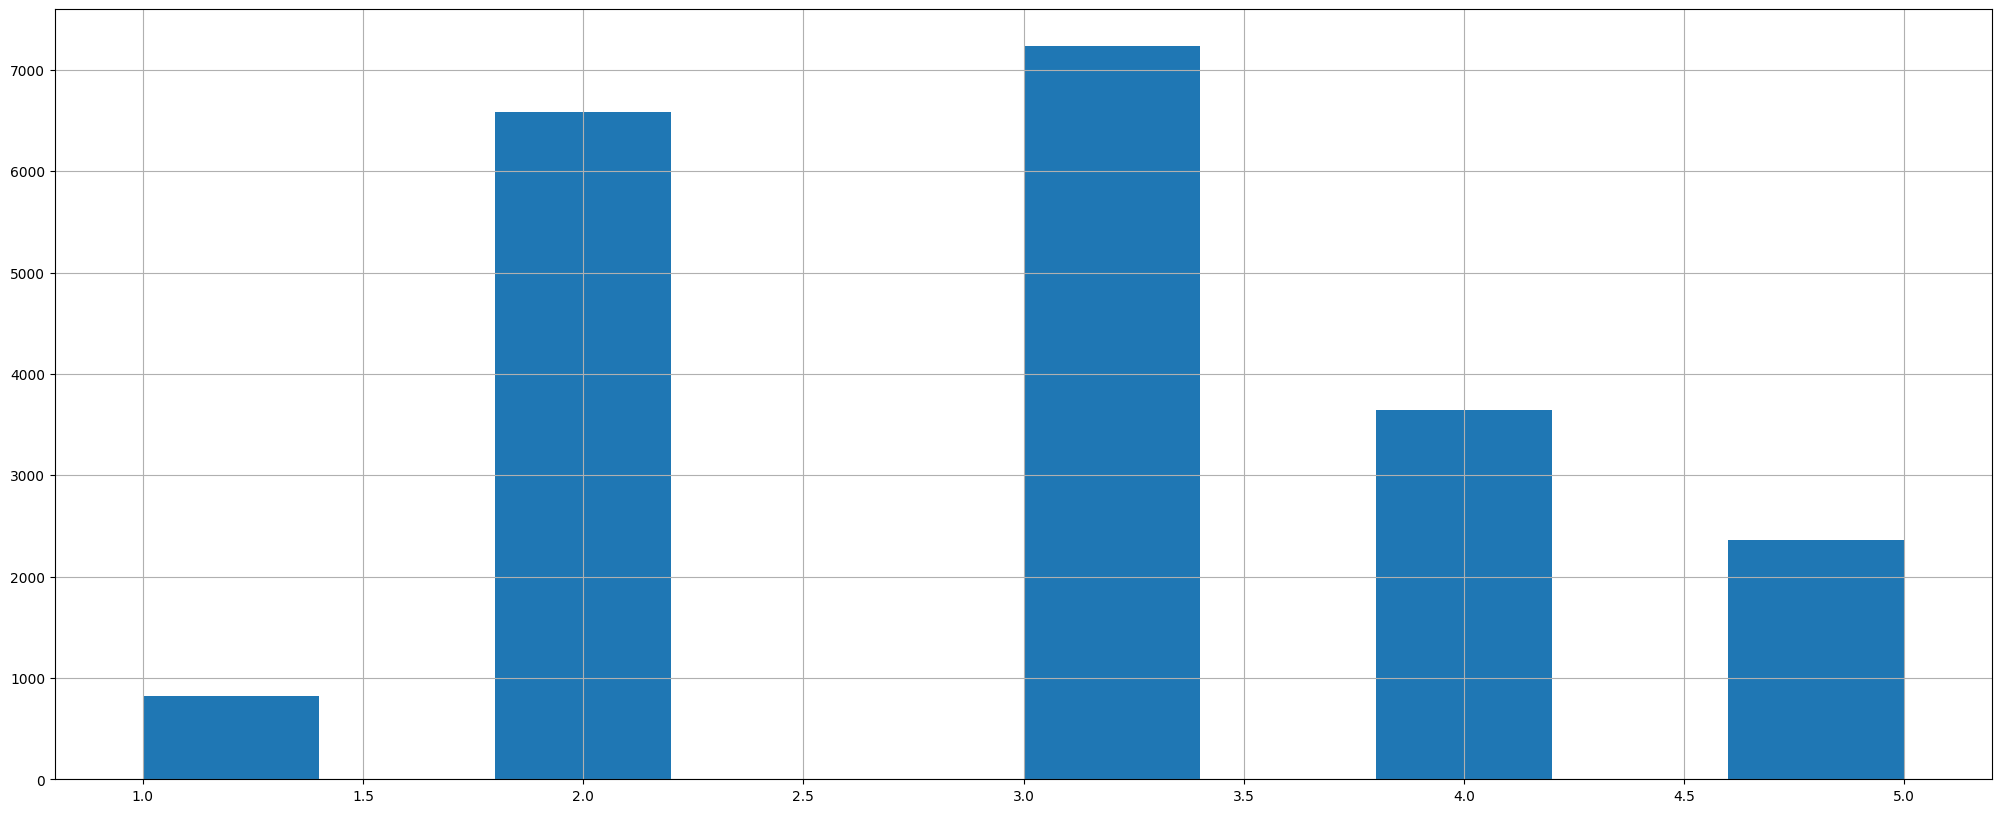

In [16]:
df["income_category"].hist(figsize = (25, 10))
plt.show()

In [17]:
# split qilingan data'ni qisqa nom ostida o'zgaruvchining ichiga copy qilib olamiz
housing = strat_train_set.copy()
housing.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
213,-122.22,37.79,46.0,2366.0,575.0,1647.0,527.0,2.6042,124700.0,NEAR BAY,2
20309,-119.15,34.17,22.0,1612.0,334.0,1431.0,335.0,4.8125,194400.0,NEAR OCEAN,4
13549,-117.31,34.13,36.0,1076.0,283.0,773.0,224.0,2.6307,66400.0,INLAND,2
16304,-121.37,38.01,15.0,2430.0,315.0,1016.0,314.0,10.0088,242000.0,INLAND,5
20492,-118.67,34.27,10.0,3753.0,678.0,1859.0,660.0,4.9946,204600.0,<1H OCEAN,4


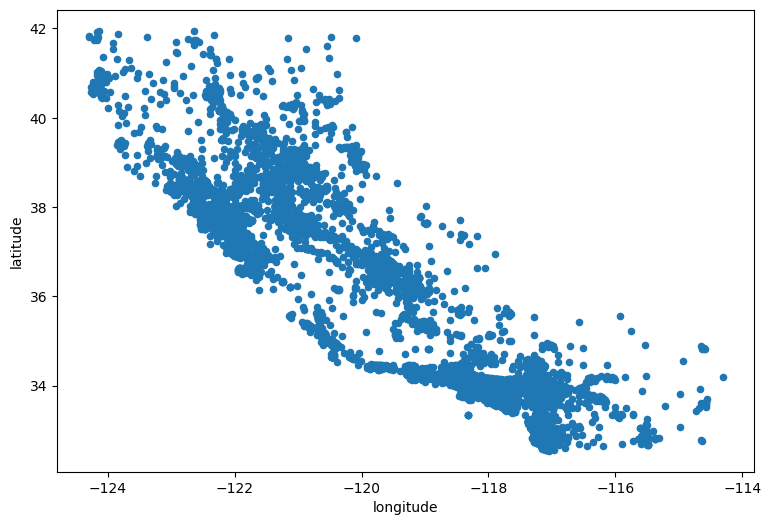

In [20]:
# Californiya shtatidagi uylarnig zichlashluvi vizualisation ko'rishimiz mumkin
housing.plot(kind = "scatter", x = "longitude", y = "latitude", figsize = (9, 6))
plt.show()

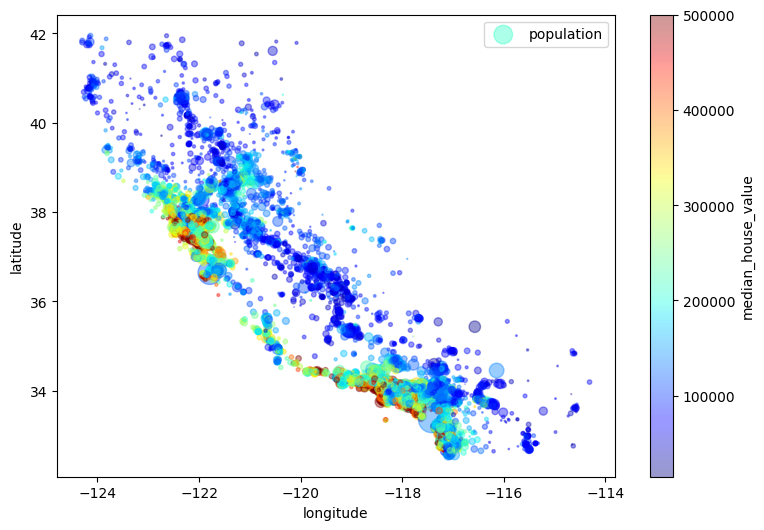

In [21]:
# mukammalroq tahlil qilamiz
housing.plot(
    kind = "scatter",
    x = "longitude",
    y = "latitude",
    alpha = 0.4,
    label = "population",
    s = housing["population"] / 100, # o'lchami aholi soniga qarab o'zgaradi
    c = "median_house_value", # rangi o'rtacha uyning narxiga qarab o'zgaradi
    cmap = "jet",
    colorbar  = True,
    figsize = (9, 6))
plt.show()

In [25]:
# uylarning o'rtacha narxlarining bog'liqligini aniqlab olishimiz mumkin
# tartiblaganimiz sababi, bizga eng katta bog'liq bo'lgan ustunlarni ko'rishimiz uchun
correlation = housing.select_dtypes(include=['number']).corrwith(housing['median_house_value']).sort_values(ascending = False)
print(correlation)

median_house_value    1.000000
median_income         0.686977
total_rooms           0.137150
housing_median_age    0.103604
households            0.066519
total_bedrooms        0.052712
population           -0.024756
longitude            -0.048672
latitude             -0.140515
dtype: float64


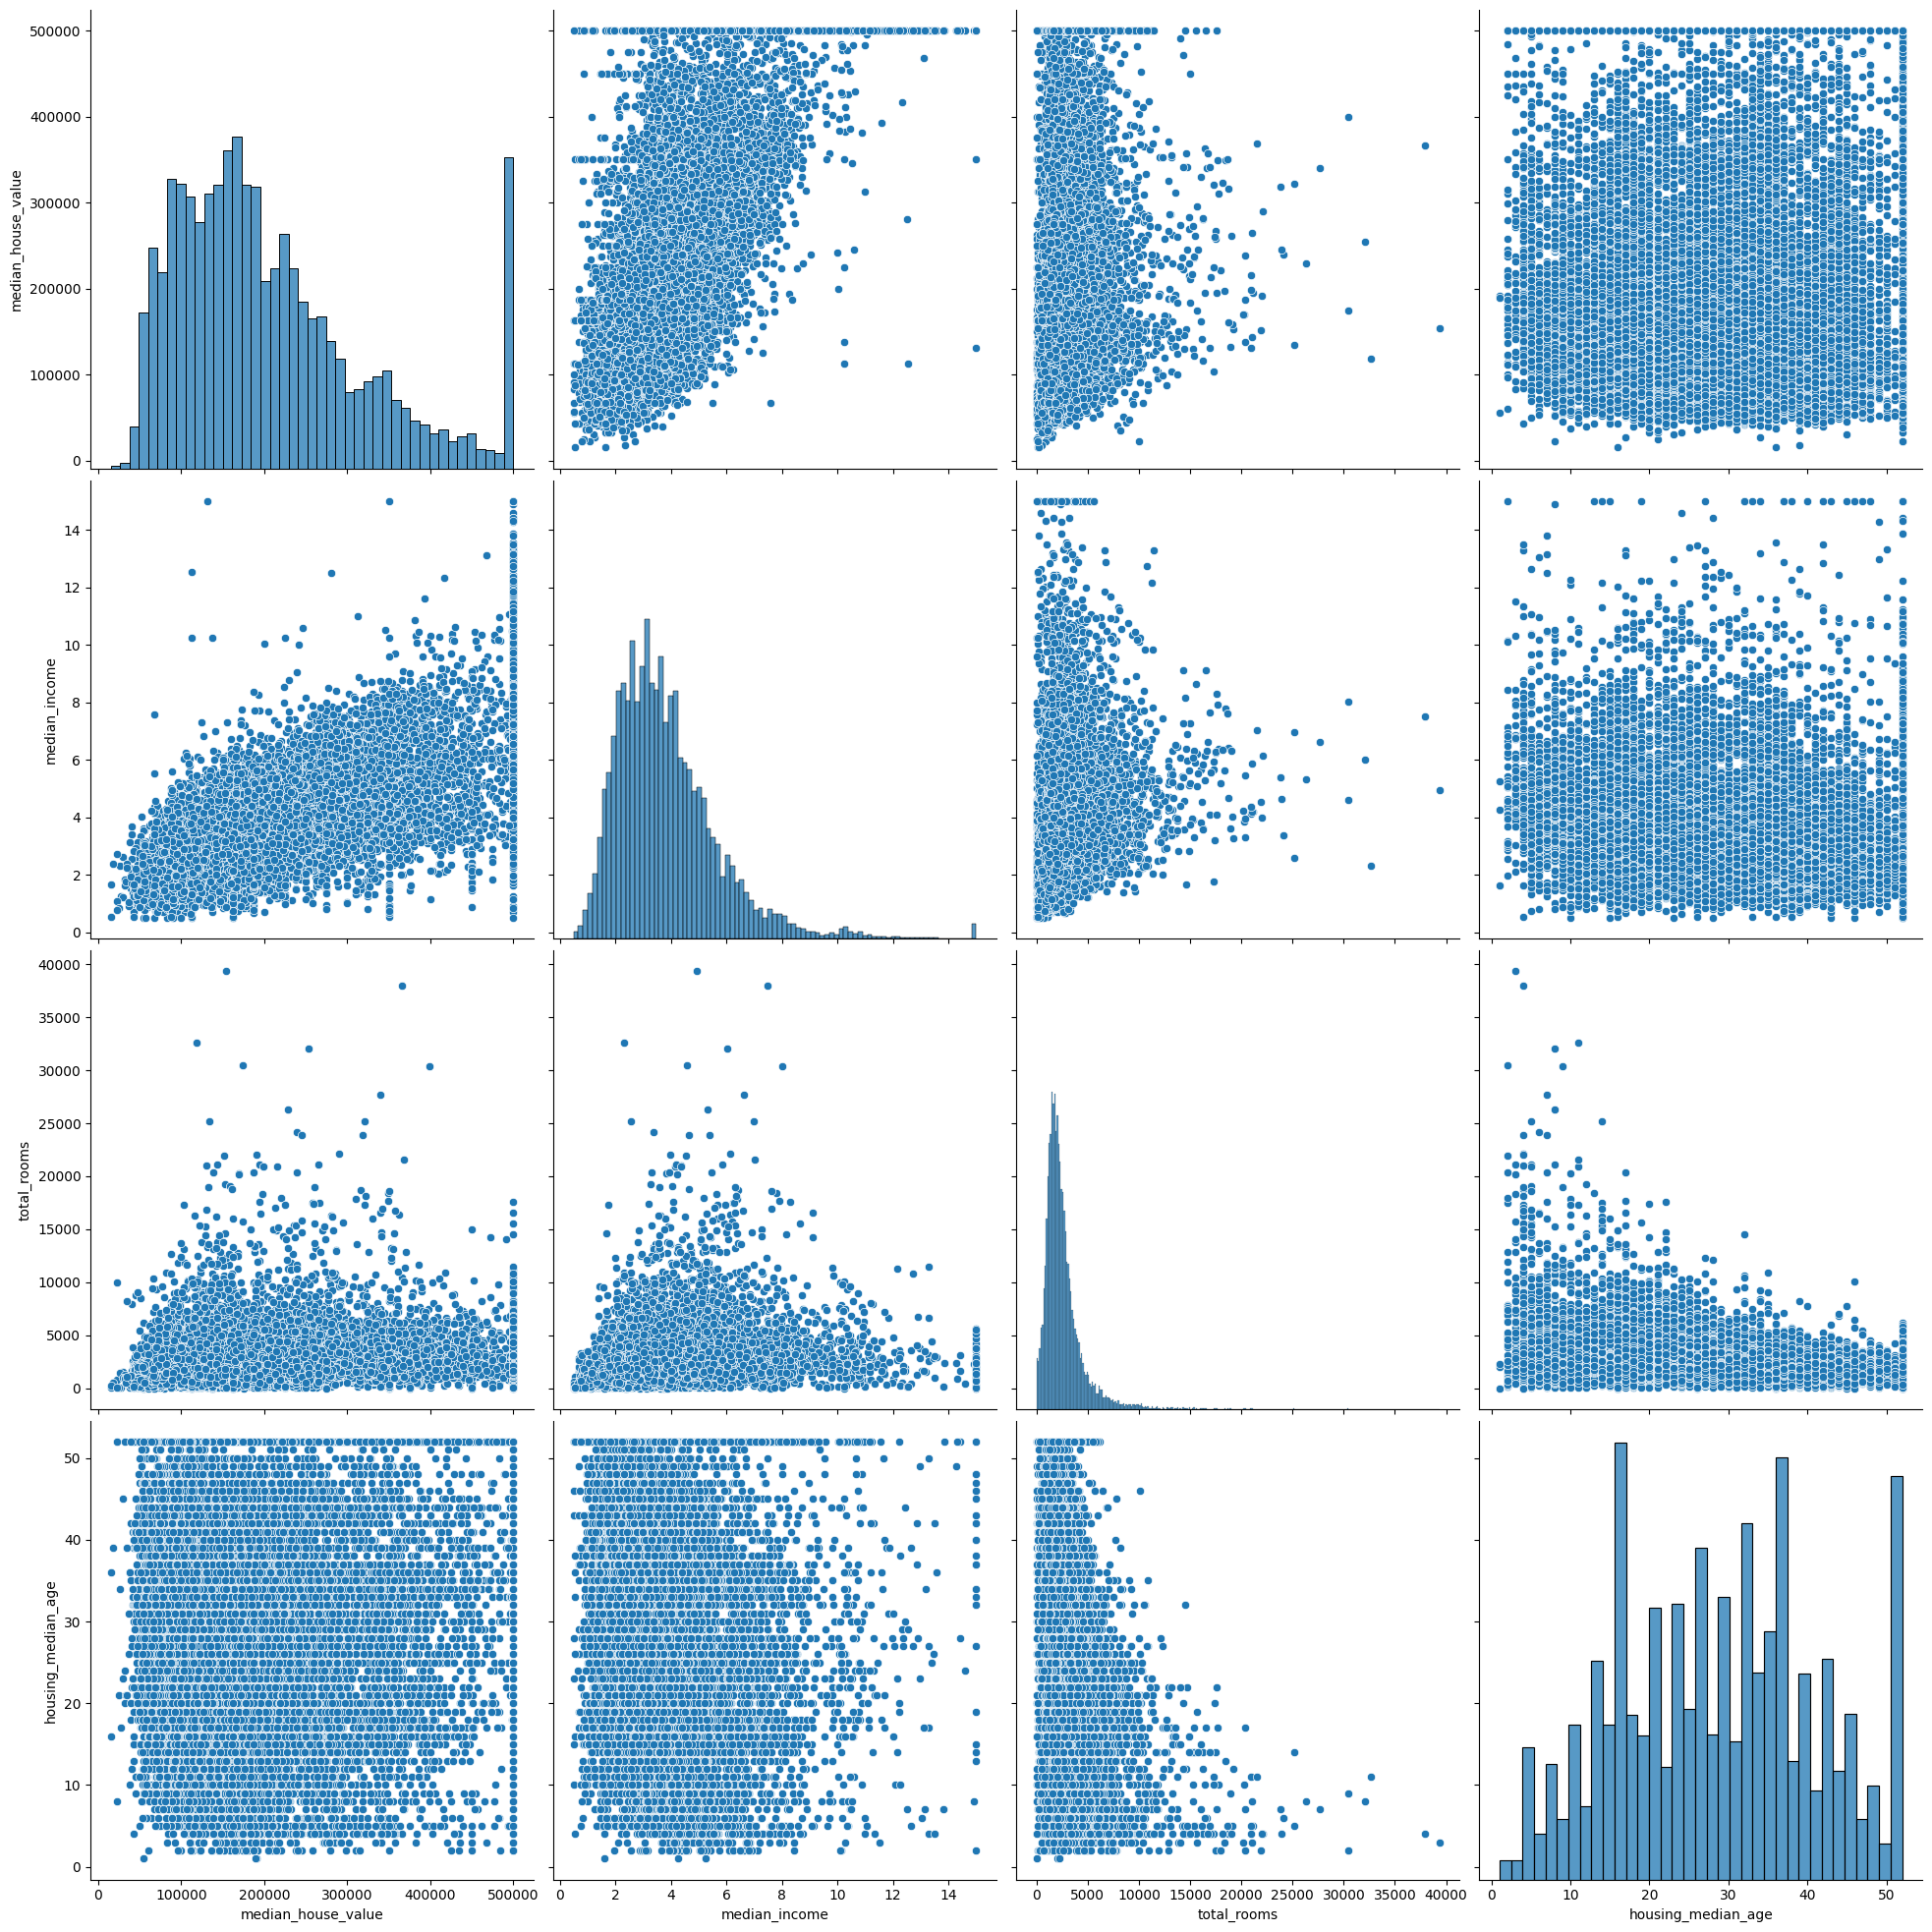

In [27]:
must_columns = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
sns.pairplot(housing[must_columns], height = 5)
plt.show()

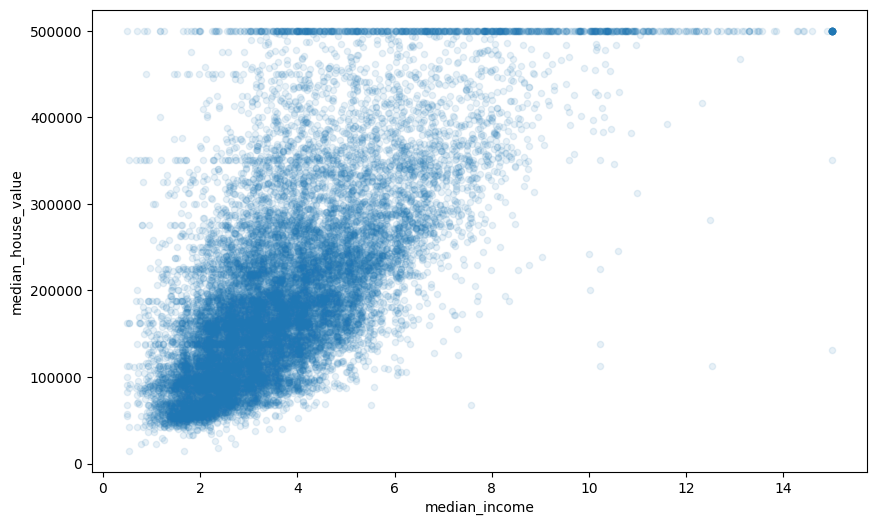

In [29]:
# bizga muhim bo'lgan ustunlarning
housing.plot(
    kind = "scatter",
    y = "median_house_value",
    x = "median_income",
    alpha = 0.1,
    figsize = (10, 6)
    )
plt.show()

In [30]:
# biz yuqoridagi df orqali yangi bizga muhim ko'rsatgichlarni aniqlab olishimiz mumkin
housing["rooms_per_household"] = housing['total_rooms'] / housing["households"]
housing["bedrooms_per_room"] = housing['total_bedrooms'] / housing["total_rooms"]
housing["population_per_household"] = housing['population'] / housing["households"]

In [31]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category,rooms_per_household,bedrooms_per_room,population_per_household
15513,-117.03,33.18,17.0,5391.0,886.0,2732.0,830.0,5.1771,212800.0,<1H OCEAN,4,6.495181,0.164348,3.291566
10111,-117.94,33.94,25.0,3250.0,546.0,1452.0,501.0,5.1084,303800.0,<1H OCEAN,4,6.487026,0.168000,2.898204
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042,206400.0,INLAND,4,7.129129,0.156698,2.654655
16700,-120.61,35.10,17.0,2799.0,637.0,2015.0,592.0,3.0536,143600.0,<1H OCEAN,3,4.728041,0.227581,3.403716
19958,-119.32,36.21,29.0,1220.0,232.0,619.0,246.0,3.3125,78300.0,INLAND,3,4.959350,0.190164,2.516260


In [33]:
corr = housing.select_dtypes(include=['number']).corrwith(housing["median_house_value"]).sort_values(ascending = False)
corr

,0
median_house_value,1.000000
median_income,0.686977
rooms_per_household,0.151376
total_rooms,0.137150
housing_median_age,0.103604
households,0.066519
total_bedrooms,0.052712
population,-0.024756
population_per_household,-0.027228
longitude,-0.048672
